In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn import linear_model

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

from sklearn import svm

In [2]:
data = pd.read_excel("Admission_Prediction.xlsx")

In [5]:
data.head(20)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1.0,337.0,118.0,4.0,4.5,4.5,9.65,1.0,0.92
1,2.0,324.0,107.0,4.0,4.0,4.5,8.87,1.0,0.76
2,3.0,NaN,104.0,3.0,3.0,3.5,8.00,1.0,0.72
3,4.0,322.0,110.0,3.0,3.5,2.5,8.67,1.0,0.80
4,5.0,314.0,103.0,2.0,2.0,3.0,8.21,0.0,0.65
5,6.0,330.0,115.0,5.0,4.5,3.0,9.34,1.0,0.90
6,7.0,321.0,109.0,NaN,3.0,4.0,8.20,1.0,0.75
7,8.0,308.0,101.0,2.0,3.0,4.0,7.90,0.0,0.68
8,9.0,302.0,102.0,1.0,2.0,1.5,8.00,0.0,0.50
9,10.0,323.0,108.0,3.0,3.5,3.0,8.60,0.0,0.45


In [7]:
data.shape

(500, 9)

In [8]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [10]:
data.isnull().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

# Filling Nan Values with mean

In [33]:
data['GRE Score'].mean()

316.55876288659795

In [35]:
data['GRE Score'] = data['GRE Score'].fillna(data['GRE Score'].mean())

In [36]:
data['TOEFL Score'] = data['TOEFL Score'].fillna(data['TOEFL Score'].mean())
data['University Rating'] = data['University Rating'].fillna(data['University Rating'].mean())

In [37]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [39]:
data.info

<bound method DataFrame.info of      Serial No.   GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  \
0           1.0  337.000000        118.0                4.0  4.5  4.5  9.65   
1           2.0  324.000000        107.0                4.0  4.0  4.5  8.87   
2           3.0  316.558763        104.0                3.0  3.0  3.5  8.00   
3           4.0  322.000000        110.0                3.0  3.5  2.5  8.67   
4           5.0  314.000000        103.0                2.0  2.0  3.0  8.21   
..          ...         ...          ...                ...  ...  ...   ...   
495       496.0  332.000000        108.0                5.0  4.5  4.0  9.02   
496       497.0  337.000000        117.0                5.0  5.0  5.0  9.87   
497       498.0  330.000000        120.0                5.0  4.5  5.0  9.56   
498       499.0  312.000000        103.0                4.0  4.0  5.0  8.43   
499       500.0  327.000000        113.0                4.0  4.5  4.5  9.04   

     Research  Chan

# Bivariate Analysis

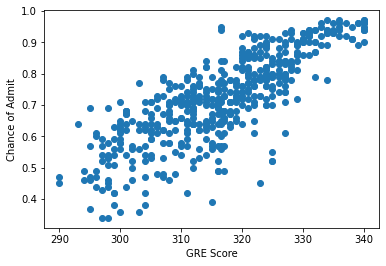

In [40]:
plt.scatter(x='GRE Score',y='Chance of Admit',data=data)
plt.xlabel('GRE Score')
plt.ylabel('Chance of Admit')
plt.show()

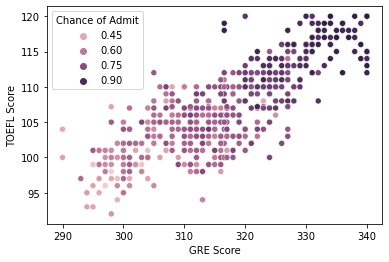

In [41]:
sns.scatterplot(x='GRE Score',y='TOEFL Score',hue='Chance of Admit',data=data)
plt.show()

# Removing Serial Number as it is not impacting our target variable

In [42]:
x = data.iloc[:,1:8]
y = data.iloc[:,8]

In [43]:
x_train , x_test, y_train, y_test = train_test_split(x,y)

In [44]:
print(x_train)
print(x_test)
print(y_train)
print(y_test)

     GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  Research
443      321.0        114.0                5.0  4.5  4.5  9.16       1.0
497      330.0        120.0                5.0  4.5  5.0  9.56       1.0
395      324.0        110.0                3.0  3.5  3.5  9.04       1.0
259      331.0        119.0                4.0  5.0  4.5  9.34       1.0
95       304.0        100.0                4.0  1.5  2.5  7.84       0.0
..         ...          ...                ...  ...  ...   ...       ...
205      295.0         99.0                2.0  2.5  3.0  7.65       0.0
54       322.0        110.0                3.0  3.0  3.5  8.00       0.0
94       303.0         99.0                3.0  2.0  2.5  7.66       0.0
192      322.0        114.0                5.0  4.5  4.0  8.94       1.0
153      324.0        105.0                3.0  3.0  4.0  8.75       0.0

[375 rows x 7 columns]
     GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  Research
48       321.0        110.0

In [45]:
LinReg = LinearRegression()

In [50]:
LinReg.fit(x_train,y_train)

LinearRegression()

In [47]:
x_train.shape

(375, 7)

In [48]:
y_train.shape

(375,)

In [49]:
y_train

443    0.87
497    0.93
395    0.82
259    0.90
95     0.42
       ... 
205    0.57
54     0.70
94     0.36
192    0.86
153    0.79
Name: Chance of Admit, Length: 375, dtype: float64

In [53]:
LinReg.coef_

array([ 0.00195645,  0.0031626 ,  0.00661968, -0.00146691,  0.01484362,
        0.12509085,  0.01561579])

In [54]:
a = LinReg.predict(x_test)

In [57]:
a[0:20]

array([0.80135948, 0.99431434, 0.70452844, 0.88153558, 0.62783227,
       0.62424861, 0.72694698, 0.80807187, 0.89004031, 0.63110885,
       0.66498732, 0.58345718, 0.77236953, 0.88423127, 0.76779003,
       0.81491133, 0.68263991, 0.50691066, 0.62473128, 0.75643649])

In [59]:
b = y_test

In [60]:
b[0:20]

48     0.82
143    0.97
201    0.72
171    0.89
314    0.66
331    0.73
389    0.76
229    0.82
188    0.93
484    0.73
278    0.66
492    0.53
339    0.81
429    0.95
26     0.76
468    0.81
231    0.74
368    0.51
477    0.65
64     0.52
Name: Chance of Admit, dtype: float64

In [61]:
# mean square error
np.mean((a-y_test)**2)

0.0037886207460238056

# Actual vs Predicted


(0.3626053351401464,
 1.0165322025875232,
 0.4603047883371124,
 1.1142316557844891)

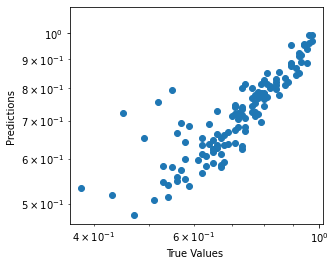

In [66]:
g=plt.scatter(b, a)
g.axes.set_yscale('log')
g.axes.set_xscale('log')
g.axes.set_xlabel('True Values ')
g.axes.set_ylabel('Predictions ')
g.axes.axis('equal')
g.axes.axis('square')

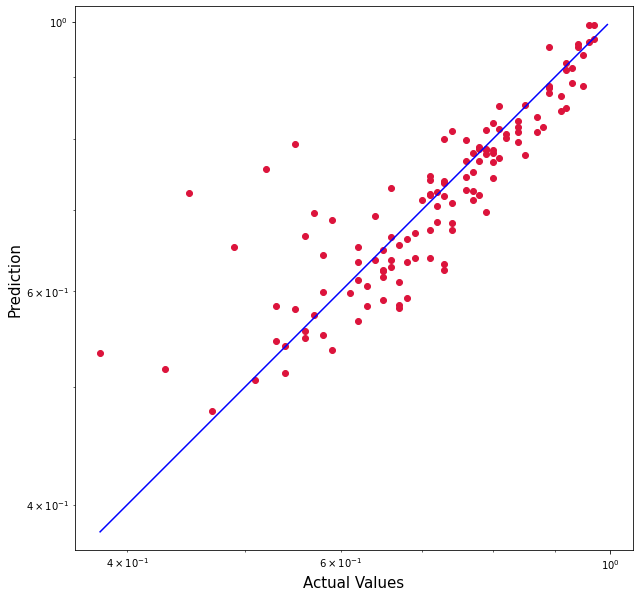

In [69]:
plt.figure(figsize=(10,10))
plt.scatter(b, a, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(a), max(b))
p2 = min(min(a), min(b))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Prediction', fontsize=15)
plt.axis('equal')
plt.show()